In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
import os
import sys
import inspect
import seaborn as sns 

base = !pwd
base = os.path.dirname(os.path.dirname(base[0]))
data_dir = os.path.join(base, 'neural-straight/data/')
if data_dir not in sys.path:
    sys.path.append(data_dir)
p = os.path.join(base, 'neural-straight/nstraight/')
if p not in sys.path:
    sys.path.append(p)
from data.datasets import MovieSet
from utils.utils import create_gif, get_trial_idx, butter_temporal_filter
from utils.curvature import compute_curvature
from visualization.visualize import vis_pca_trajectory, view_frames
import data.data_schemas as data

Connecting scadena@172.25.106.59:3306


In [5]:
file = '{}movies16314-4-3-pre3-pipe1-seg3-spike5.h5'.format(data_dir)
dataset = MovieSet(file, 'inputs', 'behavior', 'eye_position', 'responses')
dataset

MovieSet m=1620:
	(inputs, behavior, eye_position, responses)
	[Transforms: ]

In [67]:
bg_conditions = data.ConditionClip() & 'movie_name like "o%bg%"'

trials = (data.InputResponse.Input() & bg_conditions).fetch('trial_idx')

indices = [get_trial_idx(dataset, t) for t in trials]

/usr/local/lib/python3.6/dist-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


#### Create big array of movies for visualization

In [68]:
size_movies = (5, 5)
big_movie = []
cnt = 0
for i in range(size_movies[0]):
    row_movie = []
    for j in range(size_movies[1]):
        cnt += 1
        ind = indices[cnt]
        movie = dataset[ind].inputs[0,]
        row_movie.append(movie)
    row_movie = np.concatenate(row_movie, axis = 2)
    big_movie.append(row_movie)

big_movie = np.concatenate(big_movie, axis = 1)

In [69]:
compute_curvature(big_movie).mean()

59.564476

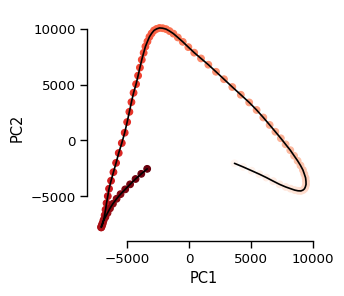

In [70]:
vis_pca_trajectory(big_movie);

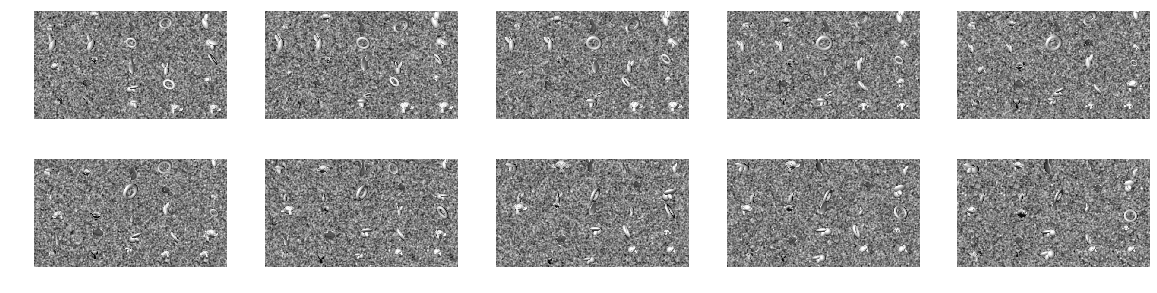

In [44]:
view_frames(big_movie)

In [61]:
#create_gif(big_movie, 'temp_vis/temp_big_movie.gif', 30)

In [71]:
bg_conditions = data.ConditionClip() & 'movie_name like "obj%v5"'

trials = (data.InputResponse.Input() & bg_conditions).fetch('trial_idx')

indices = [get_trial_idx(dataset, t) for t in trials]

/usr/local/lib/python3.6/dist-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [72]:
size_movies = (5, 5)
big_movie = []
cnt = 0
inds_rand = np.random.permutation(indices)
for i in range(size_movies[0]):
    row_movie = []
    for j in range(size_movies[1]):
        cnt += 1
        ind = inds_rand[cnt]
        movie = dataset[ind].inputs[0,]
        row_movie.append(movie)
    row_movie = np.concatenate(row_movie, axis = 2)
    big_movie.append(row_movie)

big_movie = np.concatenate(big_movie, axis = 1)

In [73]:
compute_curvature(big_movie).mean()

80.85949

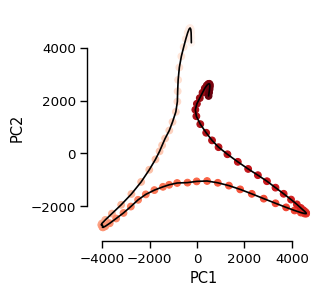

In [75]:
vis_pca_trajectory(big_movie);

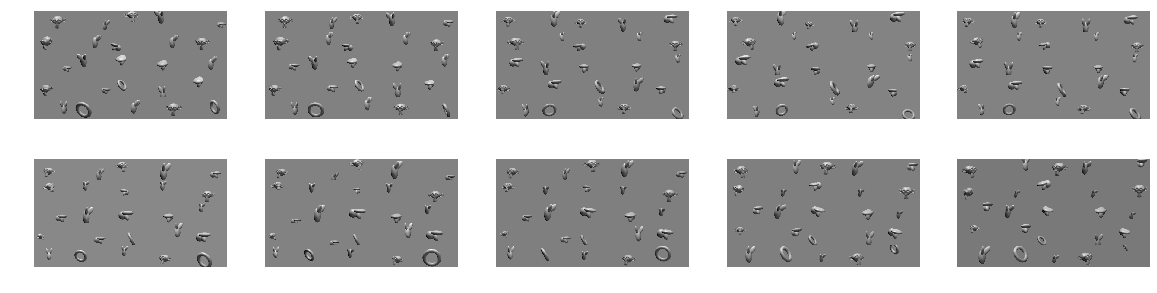

In [64]:
view_frames(big_movie)

In [66]:
#create_gif(big_movie, 'temp_vis/temp_big_movie_v5.gif', 30)

### patch analysis

In [81]:
patch = dataset[0].inputs[0]
patch = patch[:,:,:25]
x = dataset[70].inputs[0]


In [92]:
compute_curvature(x).mean()

73.92302

In [93]:
noisypatch_x = np.concatenate([patch, x], axis = 2)

In [88]:
create_gif(noisypatch_x, 'temp_vis/added_noisy_patch.gif', 30)

/usr/local/lib/python3.6/dist-packages/array2gif/core.py:108: UserWarning: 
Your image was cast to a `uint8` (`<img>.astype(uint8)`), but some information was lost.
Please check your gif and convert to uint8 beforehand if the gif looks wrong.
  warnings.warn(message)


In [95]:
'Curvature: {:.3f}'.format(compute_curvature(noisypatch_x).mean())

'Curvature: 66.043'